# Projet Data Mining

Max length = 2760
Max time = 2758 days 23:00:00


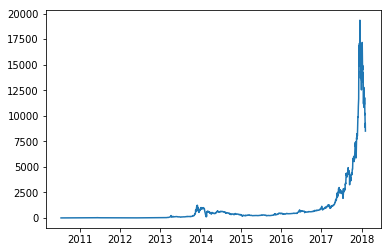

,close,high,low,open,time,volumefrom,volumeto,timestamp
2755,10226.86,10377.96,9698.13,10107.40,1517356800,122260.49,1.230903e+09,2018-01-31
2756,9114.72,10280.84,8726.95,10226.86,1517443200,208918.80,1.964309e+09,2018-02-01
2757,8870.82,9147.93,7786.20,9114.73,1517529600,322596.22,2.768760e+09,2018-02-02
2758,9251.27,9504.37,8194.68,8872.87,1517616000,139226.07,1.253485e+09,2018-02-03
2759,8495.60,9400.99,8284.25,9251.27,1517702400,94322.67,8.358988e+08,2018-02-04


In [1]:
import requests
import datetime
import pandas as pd
import numpy as np 
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
from collections import Counter
import copy
from operator import itemgetter
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

def daily_price_historical(symbol, comparison_symbol, histoday=True, limit=1, aggregate=1, allData='true'):
    # api url
    if histoday:
        url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}&allData={}' \
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate, allData)
    else:
        url = 'https://min-api.cryptocompare.com/data/histohour?fsym={}&tsym={}&limit={}&aggregate={}&allData={}' \
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate, allData)

    # fetch data
    page = requests.get(url)
    data = page.json()['Data']

    # Convert Json to Table
    df = pd.DataFrame(data)

    # add a column with timestamp
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]

    return df


df = daily_price_historical('BTC', 'USD', True)
print('Max length = {}'.format(len(df)))
print('Max time = {}'.format((df.timestamp.max() - df.timestamp.min())))

plt.plot(df.timestamp, df.close)
plt.show()
df['timestamp'] = df['timestamp'].dt.strftime('%Y-%m-%d')
df.tail(5)

In [2]:
df2 = df.set_index('timestamp')
df2.head(7)

,close,high,low,open,time,volumefrom,volumeto
timestamp,,,,,,,
2010-07-17,0.04951,0.04951,0.04951,0.04951,1279324800,20.00,0.9902
2010-07-18,0.08584,0.08585,0.05941,0.04951,1279411200,75.01,5.0900
2010-07-19,0.08080,0.09307,0.07723,0.08584,1279497600,574.00,49.6600
2010-07-20,0.07474,0.08181,0.07426,0.08080,1279584000,262.00,20.5900
2010-07-21,0.07921,0.07921,0.06634,0.07474,1279670400,575.00,42.2600
2010-07-22,0.05050,0.08181,0.05050,0.07921,1279756800,2160.00,129.7800
2010-07-23,0.06262,0.06767,0.05050,0.05050,1279843200,2402.50,141.0700


In [3]:
pa = pd.read_csv('crypto_learning/results.csv', usecols=["Date","Value"])
pa['Date'] = [pd.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in pa.Date]
pa = pa.set_index('Date')

18


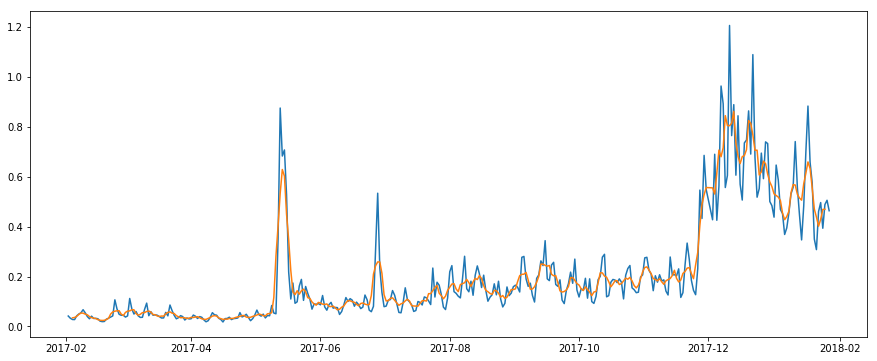

In [4]:
rcParams['figure.figsize'] = 15, 6
pa['mean'] = pa.rolling(window=5, center=True).mean()
ts = pa['mean']

print(np.count_nonzero(abs(ts-pa['Value'])>0.15))

plt.plot(pa)

### Création colonne buzz

In [5]:
pa['buzz']='c'
pa['buzz'][(pa['Value']-ts)>0.15]='u'
pa['buzz'][(pa['Value']-ts)<-0.15]='d'

### Concaténation avec la première table

In [6]:
pa = pa.join(df2)

In [7]:
pa = pa[['open','close','buzz']]

### Affichage des différents buzz/debuzz

In [8]:
pa[pa['buzz']!='c']

,open,close,buzz
Date,,,
2017-05-11,1752.31,1819.29,d
2017-05-13,1686.39,1763.74,u
2017-06-28,2583.75,2577.74,u
2017-11-29,9906.04,9837.86,u
2017-12-04,11244.20,11623.91,u
2017-12-05,11624.37,11667.13,d
2017-12-07,13750.09,16850.31,u
2017-12-08,16867.98,16047.61,u
2017-12-09,16048.18,14843.42,d


### Création de la variable d'ecart

In [9]:
pa['ecart'] = pa['close']-pa['open']

In [10]:
epsilon1 = 0.005
epsilon2 = 0.1

,open,close,buzz,ecart,variation
Date,,,,,
2017-06-12,2973.45,2656.77,c,-316.68,-2
2017-07-15,2234.17,1975.08,c,-259.09,-2
2017-07-17,1914.09,2233.39,c,319.30,2
2017-07-20,2282.58,2866.02,c,583.44,2
2017-08-05,2878.49,3262.80,c,384.31,2
2017-09-14,3870.29,3243.08,c,-627.21,-2
2017-09-15,3243.08,3713.76,c,470.68,2
2017-09-18,3689.61,4100.28,c,410.67,2
2017-10-12,4824.20,5432.62,c,608.42,2


In [78]:
def variation(epsilon1,epsilon2,epsilon3=False):
    pa['variation'] = 0
    pa['variation'][(pa['ecart']>pa['open']*epsilon1) & (pa['ecart']<pa['open']*epsilon2)] = 1
    pa['variation'][(pa['ecart']<-pa['open']*epsilon1) & (pa['ecart']>-pa['open']*epsilon2)] = -1
    if not epsilon3 :
        pa['variation'][pa['ecart'] < -pa['open']*epsilon2] = -2
        pa['variation'][pa['ecart'] > pa['open']*epsilon2] = 2
    else :
        pa['variation'][(pa['ecart']>pa['open']*epsilon2) & (pa['ecart']<pa['open']*epsilon3)] = 2
        pa['variation'][(pa['ecart']<-pa['open']*epsilon2) & (pa['ecart']>-pa['open']*epsilon3)] = -2
        pa['variation'][pa['ecart'] < -pa['open']*epsilon3] = -3
        pa['variation'][pa['ecart'] > pa['open']*epsilon3] = 3

In [79]:
variation(0.005,0.05,0.1)

In [83]:
pa[abs(pa['variation'])>1].head(10)

,open,close,buzz,ecart,variation
Date,,,,,
2017-02-09,1055.49,978.96,c,-76.53,-2
2017-03-08,1232.69,1146.97,c,-85.72,-2
2017-03-10,1191.33,1112.39,c,-78.94,-2
2017-03-11,1112.39,1179.22,c,66.83,2
2017-03-16,1253.43,1172.88,c,-80.55,-2
2017-03-17,1172.88,1071.71,c,-101.17,-2
2017-03-18,1071.71,971.38,c,-100.33,-2
2017-03-19,971.38,1022.60,c,51.22,2
2017-03-21,1047.51,1121.29,c,73.78,2


In [11]:
print(sum(pa['variation']==-2))
print(sum(pa['variation']==-1))
print(sum(pa['variation']==0))
print(sum(pa['variation']==1))
print(sum(pa['variation']==2))

7
112
51
173
15


### Fonctions de création des séquences

In [73]:
def sequences(distance_buzz, liste_variation, liste_buzz) :
    seq1 = [liste_variation[i-distance_buzz:(i+distance_buzz+1)] 
            for i in range(len(liste_variation[:-(distance_buzz-1)])) 
            if abs(liste_variation[i])==2]
    seq1 = [list(map(str,s)) for s in seq1]
    
    seq2 = [liste_buzz[i-distance_buzz:(i+distance_buzz+1)] 
            for i in range(len(liste_variation[:-(distance_buzz-1)])) 
            if abs(liste_variation[i])==2]
    
    zipped_list = [list(zip(seq1[i], seq2[i])) for i in range(len(seq1))]
    zipped_list2 = [[list(a[i]) for i in range(len(a))] for a in zipped_list]
    result = [[t  if (t[1]!='c') else [t[0]] for t in s] for s in zipped_list2]
    return result

In [56]:
[i  if (i%2==0) else 33 for i in range(5)]
[]

[0, 33, 2, 33, 4]

In [74]:
test_seq = sequences(3,pa['variation'].tolist(),pa['buzz'].tolist())
test_seq

[[['0'], ['1'], ['1'], ['-2'], ['1'], ['-1'], ['-1']],
 [['1'], ['-1'], ['-1'], ['-2'], ['-1'], ['2'], ['1']],
 [['-1'], ['-2'], ['-1'], ['2'], ['1'], ['-1'], ['2']],
 [['2'], ['1'], ['-1'], ['2'], ['-1'], ['1'], ['-1']],
 [['-1'], ['1'], ['1'], ['2'], ['-1'], ['1'], ['1']],
 [['-1'], ['-1'], ['-1'], ['-2'], ['2'], ['0'], ['0']],
 [['-1'], ['-1'], ['-2'], ['2'], ['0'], ['0'], ['2']],
 [['2'], ['0'], ['0'], ['2'], ['-1'], ['-1'], ['-1']],
 [['1'], ['0'], ['1'], ['2'], ['1'], ['1'], ['-1']],
 [['-1'], ['-1'], ['-1'], ['2'], ['1'], ['2'], ['1']],
 [['-1'], ['2'], ['1'], ['2'], ['1'], ['-1'], ['1']],
 [['1'], ['1', 'u'], ['0', 'd'], ['2'], ['2', 'u'], ['-1', 'u'], ['-1', 'd']],
 [['1', 'u'],
  ['0', 'd'],
  ['2'],
  ['2', 'u'],
  ['-1', 'u'],
  ['-1', 'd'],
  ['1', 'd']],
 [['-1', 'u'], ['-1', 'd'], ['1', 'd'], ['2', 'u'], ['1'], ['-1'], ['1']],
 [['-1'], ['-1'], ['-1'], ['-2', 'u'], ['1'], ['-1', 'd'], ['0']],
 [['1'], ['-1', 'd'], ['0'], ['2'], ['-1'], ['-1'], ['0']],
 [['-1'], ['-1'], [

In [14]:
type(test_seq[0][0][0])

str

In [15]:
def sequ_buzz(taille):
    tab = [[pa['variation'].loc[idx],pa['buzz'].loc[idx]] for idx in pa.index]
    return sequences(taille,tab)

#### On écrit la fonction isSubSeq qui renvoie si la séquence sub est sub-séquence de la séquence seq.

### Fonction de test isSubSeq

In [16]:
def isSubSeq(seq,sub) :
    newsub = list(sub)
    return(SubSeq(seq,newsub))

#### On recherche de manière récursive chaque élément de la sous-séquence dans la séquence principale, tout en avançant dans cette dernière sans retour en arrière. Tant que l'on trouve les éléments on continue la recherche. Si il n'y a plus d'éléments à rechercher, c'est bon et on remonte les appels en renvoyant des True. Si l'un des éléments de la sous-séquence potentielle n'a pas été trouvé, False est renvoyé.

In [17]:
def SubSeq(seq,newsub,level=0) :
    if(not newsub):
        return True
    first = set(newsub.pop(0))
    for i in range(level,len(seq)) :
        if set(seq[i]).issuperset(first) : 
            return SubSeq(seq,newsub,i+1)
    return False

In [18]:
test=[['a'],['b','c'],['a']]
test2=[['c'],['b']]
test3=[['a'],['c']]
print(isSubSeq(test,test2))
isSubSeq(test,test3)

False


True

#### fonction de calcul du  support d'une séquence

In [19]:
def support(dict,tested_seq) :
    return sum(1 for seq in dict if isSubSeq(seq,tested_seq)) 

In [20]:
datatest = [test,test2,test3]
support(datatest,['a','c'])

2

## fonction get_cand

### Premiere fonction de création de candidats de taille k à partir de deux seq de taille k-1

#### Version qui concatène les éléments en bout de séquence :

In [21]:
def generateCandidatesForPair(cand1, cand2):
    cand1Clone = copy.deepcopy(cand1)
    cand2Clone = copy.deepcopy(cand2)
    # drop the leftmost item from cand1:
    if (len (cand1[0]) == 1):
        cand1Clone.pop(0)
    else:
        cand1Clone[0] = cand1Clone[0][1:]
    # drop the rightmost item from cand2:
    if (len (cand2[-1]) == 1):
        cand2Clone.pop(-1)
    else:
        cand2Clone[-1] = cand2Clone[-1][:-1]
    
    # if the result is not the same, then we dont need to join
    if not cand1Clone == cand2Clone:
        return []
    else:
        newCandidate = copy.deepcopy(cand1)
        if (len (cand2[-1]) == 1):
            newCandidate.append(cand2[-1])
        else:
            newCandidate[-1].extend(cand2[-1][-1])
        return newCandidate

In [22]:
def sequenceLength(sequence) : 
    return sum(len(seq) for seq in sequence)

#### on génère les candidats avec 

In [23]:
def generateCandidates(lastLevelCandidates,focus_val):
    k = sequenceLength(lastLevelCandidates[0]) + 1
    if (k == 2):
        flatShortCandidates = [item for sublist2 in lastLevelCandidates for sublist1 in sublist2 for item in sublist1]
        candidates = [[[a, b]] for a in flatShortCandidates for b in flatShortCandidates if( b > a and (a in focus_val or b in focus_val))]
    else:
        candidates = []
    for i in range(0, len(lastLevelCandidates)):
        for j in range(0, len(lastLevelCandidates)):
            newCand = generateCandidatesForPair(lastLevelCandidates[i], lastLevelCandidates[j])
            if (not newCand == [] and (True in [ (i in t) for i in focus_val for t in newCand])):
                candidates.append(newCand)
    candidates.sort()
    return candidates

In [24]:
a = range(5)
b = range(1,3)
[i*j for i in a for j in b]

[0, 0, 1, 2, 2, 4, 3, 6, 4, 8]

In [25]:
level_test = [[['a']],[['b']],[['c']],[['d']]]
level_test_2 = generateCandidates(level_test,'a')
print(level_test_2)

[[['a'], ['a']], [['a'], ['b']], [['a'], ['c']], [['a'], ['d']], [['a', 'b']], [['a', 'c']], [['a', 'd']], [['b'], ['a']], [['c'], ['a']], [['d'], ['a']]]


In [26]:
level_test_3 = generateCandidates(level_test_2,'a')
level_test_3

[[['a'], ['a'], ['a']],
 [['a'], ['a'], ['b']],
 [['a'], ['a'], ['c']],
 [['a'], ['a'], ['d']],
 [['a'], ['a', 'b']],
 [['a'], ['a', 'c']],
 [['a'], ['a', 'd']],
 [['a'], ['b'], ['a']],
 [['a'], ['c'], ['a']],
 [['a'], ['d'], ['a']],
 [['a', 'b'], ['a']],
 [['a', 'c'], ['a']],
 [['a', 'd'], ['a']],
 [['b'], ['a'], ['a']],
 [['b'], ['a'], ['b']],
 [['b'], ['a'], ['c']],
 [['b'], ['a'], ['d']],
 [['b'], ['a', 'b']],
 [['b'], ['a', 'c']],
 [['b'], ['a', 'd']],
 [['c'], ['a'], ['a']],
 [['c'], ['a'], ['b']],
 [['c'], ['a'], ['c']],
 [['c'], ['a'], ['d']],
 [['c'], ['a', 'b']],
 [['c'], ['a', 'c']],
 [['c'], ['a', 'd']],
 [['d'], ['a'], ['a']],
 [['d'], ['a'], ['b']],
 [['d'], ['a'], ['c']],
 [['d'], ['a'], ['d']],
 [['d'], ['a', 'b']],
 [['d'], ['a', 'c']],
 [['d'], ['a', 'd']]]

### Fonction de génération des sous-séquences

In [27]:
def generateDirectSubsequences(sequence):
    result = []
    for i, itemset in enumerate(sequence):
        if (len(itemset) == 1):
            sequenceClone = copy.deepcopy(sequence)
            sequenceClone.pop(i)
            result.append(sequenceClone)
        else:
            for j in range(len(itemset)):
                sequenceClone = copy.deepcopy(sequence)
                sequenceClone[i].pop(j)
                result.append(sequenceClone)
    return result

## Algorithme Apriori àproprement parler :

In [48]:
def apriori(dataset, minSupport, focus_value, verbose=False, taillemin = 2,taillemax = 0):
    if taillemax == 0 :
        taillemax = taillemin+1
    global numberOfCountingOperations
    numberOfCountingOperations = 0
    Overall = []
    itemsInDataset = sorted(set ([item for sublist1 in dataset for sublist2 in sublist1 for item in sublist2]))
    singleItemSequences = [[[item]] for item in itemsInDataset]
    singleItemCounts = [(i, support(dataset, i)) for i in singleItemSequences if (support(dataset, i) >= minSupport)]
    Overall.append(singleItemCounts)
    #print("Result, lvl 1: " + str(Overall[0]))
    k = 1
    while (True):
        if not Overall [k - 1]:
            break
        # 1. Candidate generation
        candidatesLastLevel = [x[0] for x in Overall[k - 1]]
        candidatesGenerated = generateCandidates(candidatesLastLevel,focus_value)
        candidatesCounts = [(i, support(dataset, i)) for i in candidatesGenerated]
        resultLvl = [(i, count) for (i, count) in candidatesCounts if (count >= minSupport)]
        if verbose:
            print("Candidats générés au niveau " + str(k + 1) + ": " )
            print(str(candidatesGenerated))
            print( "Resultat au niveau " + str(k + 1) + ": " )
            print(str(resultLvl))
        Overall.append(resultLvl)
        k = k + 1
    # "flatten" Overall
    Overall = Overall [:-1]
    Overall = [item for sublist in Overall for item in sublist]
    Overall = sorted(Overall,key=itemgetter(1),reverse=True)
    return [i for i in Overall if (len(i[0])>=taillemin and len(i[0])<=taillemax)]

In [29]:
res = apriori(test_seq,6,focus_value = ['-2','2'],verbose=True,taillemin=3,taillemax=3)
res

Result, lvl 1: [([['-1']], 22), ([['-2']], 10), ([['0']], 14), ([['1']], 19), ([['2']], 18), ([['c']], 22), ([['d']], 7), ([['u']], 7)]
Candidats générés au niveau 2: 
[[['-1'], ['-2']], [['-1'], ['2']], [['-1', '-2']], [['-1', '2']], [['-2'], ['-1']], [['-2'], ['-2']], [['-2'], ['0']], [['-2'], ['1']], [['-2'], ['2']], [['-2'], ['c']], [['-2'], ['d']], [['-2'], ['u']], [['-2', '0']], [['-2', '1']], [['-2', '2']], [['-2', 'c']], [['-2', 'd']], [['-2', 'u']], [['0'], ['-2']], [['0'], ['2']], [['0', '2']], [['1'], ['-2']], [['1'], ['2']], [['1', '2']], [['2'], ['-1']], [['2'], ['-2']], [['2'], ['0']], [['2'], ['1']], [['2'], ['2']], [['2'], ['c']], [['2'], ['d']], [['2'], ['u']], [['2', 'c']], [['2', 'd']], [['2', 'u']], [['c'], ['-2']], [['c'], ['2']], [['d'], ['-2']], [['d'], ['2']], [['u'], ['-2']], [['u'], ['2']]]
Resultat au niveau 2: 
[([['-1'], ['-2']], 9), ([['-1'], ['2']], 13), ([['-2'], ['-1']], 8), ([['-2'], ['1']], 8), ([['-2'], ['2']], 6), ([['-2'], ['c']], 10), ([['-2', 'c'

[([['c'], ['2'], ['c']], 15),
 ([['-1'], ['2'], ['c']], 13),
 ([['c'], ['2'], ['-1']], 13),
 ([['c'], ['2'], ['1']], 11),
 ([['1'], ['2'], ['-1']], 10),
 ([['1'], ['2'], ['c']], 10),
 ([['c'], ['-2'], ['c']], 10),
 ([['-1'], ['-2'], ['c']], 9),
 ([['-1'], ['2'], ['-1']], 9),
 ([['-1'], ['2'], ['1']], 9),
 ([['0'], ['2'], ['-1']], 9),
 ([['1'], ['2'], ['1']], 9),
 ([['c'], ['-2'], ['-1']], 8),
 ([['c'], ['-2'], ['1']], 8),
 ([['-1'], ['-2'], ['-1']], 7),
 ([['-1'], ['-2'], ['1']], 7),
 ([['0'], ['2'], ['c']], 7),
 ([['-1'], ['-2'], ['2']], 6),
 ([['-2'], ['2'], ['c']], 6),
 ([['2'], ['c'], ['2']], 6),
 ([['c'], ['-2'], ['2']], 6),
 ([['-1'], ['-2'], ['2', 'c']], 6),
 ([['-1'], ['-2', 'c'], ['2']], 6),
 ([['-2', 'c'], ['2'], ['c']], 6),
 ([['2'], ['c'], ['2', 'c']], 6),
 ([['c'], ['-2'], ['2', 'c']], 6),
 ([['c'], ['-2', 'c'], ['2']], 6),
 ([['-1'], ['-2', 'c'], ['2', 'c']], 6),
 ([['c'], ['-2', 'c'], ['2', 'c']], 6)]

In [81]:
for i in range(3,16) :
    print("Séquences de taille "+str(2*i+1)+" :")
    print(apriori(sequences(i,pa['variation'].tolist(),pa['buzz'].tolist()),10,focus_value = ['-3','3'],taillemin=i/2))

Séquences de taille 7 :
[([['3'], ['-1']], 11), ([['-1'], ['3']], 10), ([['1'], ['3']], 10)]
Séquences de taille 9 :
[([['3'], ['-1']], 15), ([['1'], ['3']], 12), ([['3'], ['1']], 12), ([['-1'], ['3']], 11), ([['3'], ['-2']], 11), ([['3'], ['2']], 11), ([['0'], ['3']], 10), ([['3'], ['0']], 10)]
Séquences de taille 11 :
[([['1'], ['3'], ['-1']], 12), ([['-1'], ['3'], ['-1']], 11), ([['1'], ['3'], ['1']], 11)]
Séquences de taille 13 :
[([['-1'], ['3'], ['-1']], 16), ([['-1'], ['3'], ['1']], 14), ([['1'], ['3'], ['1']], 14), ([['1'], ['3'], ['-1']], 13), ([['-1'], ['3'], ['2']], 12), ([['0'], ['3'], ['-1']], 12), ([['0'], ['-3'], ['-1']], 11), ([['1'], ['3'], ['2']], 11), ([['-1'], ['-3'], ['-1']], 10), ([['-2'], ['-3'], ['-1']], 10), ([['-2'], ['3'], ['-1']], 10), ([['0'], ['3'], ['-2']], 10), ([['1'], ['3'], ['-2']], 10)]
Séquences de taille 15 :
[]
Séquences de taille 17 :
[([['3'], ['1'], ['3'], ['-1']], 12), ([['-2'], ['-3'], ['3'], ['-1']], 11), ([['3'], ['1'], ['3'], ['1']], 11), 

# Fonction de recherche

#### On a différents paramètres à faire varier : 

### Recherche des séquences qui se répètent de taille max

In [33]:
seqtest = sequences(3,ecart)
occmax = 1
tailleseq = 31
while occmax < 2 :
    seqtest = sequences(tailleseq,ecart)
    c = Counter(map(tuple,seqtest))
    c = pd.DataFrame.from_dict(c,orient='index').reset_index()
    c = c.rename(columns = {"index":"sequences",0:"occurences"} )
    c = c.sort_values(by="occurences",ascending=False)
    c = c.reset_index(drop = True)
    c= np.array(c)
    occmax = max(occmax,c[0,1])
    print(occmax)
    tailleseq -= 1
    
print(tailleseq+1)
print(c)
#c[sum(abs(c))>1]

NameError: name 'ecart' is not defined

In [ ]:
seq